In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame({"key1":list("aabbab"),"key2":["one","two","three"]*2,"data1":np.random.randn(6),"data2":np.random.randn(6)})
df

key1   key2     data1     data2
0    a    one  2.312514 -1.723804
1    a    two -1.223485  1.882209
2    b  three  0.698024 -0.524938
3    b    one -0.343830  0.658111
4    a    two  1.280867  0.110697
5    b  three -0.593772  0.914860

In [3]:
group=df["data1"].groupby(df["key1"])

In [4]:
group

In [5]:
group.mean()

key1
a    0.789965
b   -0.079859
Name: data1, dtype: float64

In [6]:
ave=df["data1"].groupby([df["key1"],df["key2"]]).mean()
ave

key1  key2 
a     one      2.312514
      two      0.028691
b     one     -0.343830
      three    0.052126
Name: data1, dtype: float64

In [7]:
ave.unstack()

key2       one     three       two
key1                              
a     2.312514       NaN  0.028691
b    -0.343830  0.052126       NaN

In [8]:
df.groupby("key1").mean(numeric_only=True)

data1     data2
key1                    
a     0.789965  0.089701
b    -0.079859  0.349344

In [9]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                     
a    one    2.312514 -1.723804
     two    0.028691  0.996453
b    one   -0.343830  0.658111
     three  0.052126  0.194961

In [11]:
for name,group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  2.312514 -1.723804
1    a  two -1.223485  1.882209
4    a  two  1.280867  0.110697
b
  key1   key2     data1     data2
2    b  three  0.698024 -0.524938
3    b    one -0.343830  0.658111
5    b  three -0.593772  0.914860


In [12]:
for (x1,x2),group in df.groupby(["key1","key2"]):
    print(x1,x2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one  2.312514 -1.723804
a two
  key1 key2     data1     data2
1    a  two -1.223485  1.882209
4    a  two  1.280867  0.110697
b one
  key1 key2    data1     data2
3    b  one -0.34383  0.658111
b three
  key1   key2     data1     data2
2    b  three  0.698024 -0.524938
5    b  three -0.593772  0.914860


In [13]:
piece = dict(list(df.groupby("key1")))

In [14]:
piece["a"]

key1 key2     data1     data2
0    a  one  2.312514 -1.723804
1    a  two -1.223485  1.882209
4    a  two  1.280867  0.110697

In [15]:
df.groupby(['key1','key2'])[['data1']].mean()

data1
key1 key2           
a    one    2.312514
     two    0.028691
b    one   -0.343830
     three  0.052126

In [16]:
fruit = pd.DataFrame(np.random.randn(4,4),columns=list("abcd"),index=["apple","cherry","banana","kiwi"])
fruit

a         b         c         d
apple  -0.227972  0.499482  0.720445  0.613591
cherry  0.291051  0.910028  0.842696  2.908830
banana  0.528205  0.298454 -1.134471  0.726737
kiwi   -1.290438 -0.609364 -0.467494 -0.695365

In [17]:
label={"a":"green","b":"yellow","c":"green","d":"yellow","e":"purple"}

In [21]:
group=fruit.groupby(label,axis=1)

C:\Users\Adria\AppData\Local\Temp\ipykernel_29900\1554457867.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  group=fruit.groupby(label,axis=1)


In [22]:
group.sum()

green    yellow
apple   0.492472  1.113073
cherry  1.133748  3.818858
banana -0.606266  1.025192
kiwi   -1.757932 -1.304729

In [24]:
s=pd.Series(label)
s

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [27]:
fruit.groupby(s,axis=1).count()

C:\Users\Adria\AppData\Local\Temp\ipykernel_29900\2731039387.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  fruit.groupby(s,axis=1).count()


green  yellow
apple       2       2
cherry      2       2
banana      2       2
kiwi        2       2

In [28]:
fruit.groupby(len).sum()

a         b         c         d
4 -1.290438 -0.609364 -0.467494 -0.695365
5 -0.227972  0.499482  0.720445  0.613591
6  0.819257  1.208482 -0.291775  3.635568

In [32]:
data=pd.DataFrame(np.random.randn(4,5),columns=[list("AAABB"),[1,2,3,1,2]])
data

A                             B          
          1         2         3         1         2
0 -0.638704  0.651496  0.672969  0.997523 -0.112212
1 -0.268137  1.310787  0.859732  1.775844 -0.009175
2  0.048189  0.475215  1.021666 -0.417492  0.360246
3 -1.135755  0.352293 -0.739552 -0.041142 -0.580163

In [33]:
data.columns.names=["letter","number"]
data

letter         A                             B          
number         1         2         3         1         2
0      -0.638704  0.651496  0.672969  0.997523 -0.112212
1      -0.268137  1.310787  0.859732  1.775844 -0.009175
2       0.048189  0.475215  1.021666 -0.417492  0.360246
3      -1.135755  0.352293 -0.739552 -0.041142 -0.580163

In [36]:
data.groupby(level="letter",axis=1).sum()

C:\Users\Adria\AppData\Local\Temp\ipykernel_29900\249029581.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level="letter",axis=1).sum()


letter         A         B
0       0.685761  0.885311
1       1.902383  1.766669
2       1.545070 -0.057246
3      -1.523014 -0.621305

In [37]:
game=pd.read_csv("vgsalesGlobale.csv")

In [39]:
game.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [40]:
game.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [41]:
game.dropna().describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [42]:
game.Global_Sales.mean()

np.float64(0.5374406555006628)

In [43]:
group=game.groupby("Genre")

In [44]:
group["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [45]:
group["Global_Sales"].describe()

count      mean       std   min   25%    50%     75%    max
Genre                                                                     
Action        3316.0  0.528100  1.156427  0.01  0.07  0.190  0.5000  21.40
Adventure     1286.0  0.185879  0.513280  0.01  0.02  0.060  0.1600  11.18
Fighting       848.0  0.529375  0.955965  0.01  0.08  0.210  0.5500  13.04
Misc          1739.0  0.465762  1.314886  0.01  0.06  0.160  0.4100  29.02
Platform       886.0  0.938341  2.585254  0.01  0.09  0.280  0.7900  40.24
Puzzle         582.0  0.420876  1.561716  0.01  0.04  0.110  0.3075  30.26
Racing        1249.0  0.586101  1.662437  0.01  0.07  0.190  0.5300  35.82
Role-Playing  1488.0  0.623233  1.707909  0.01  0.07  0.185  0.5225  31.37
Shooter       1310.0  0.791885  1.817263  0.01  0.08  0.230  0.7275  28.31
Simulation     867.0  0.452364  1.195255  0.01  0.05  0.160  0.4200  24.76
Sports        2346.0  0.567319  2.089716  0.01  0.09  0.220  0.5600  82.74
Strategy       681.0  0.257151  0.520908  0.01  0.04  0.090  0.2700   5.45

In [46]:
game[game.Genre=="Action"].Global_Sales.mean()

np.float64(0.5281001206272617)

In [47]:
group.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [48]:
%matplotlib inline

<Axes: xlabel='Genre'>

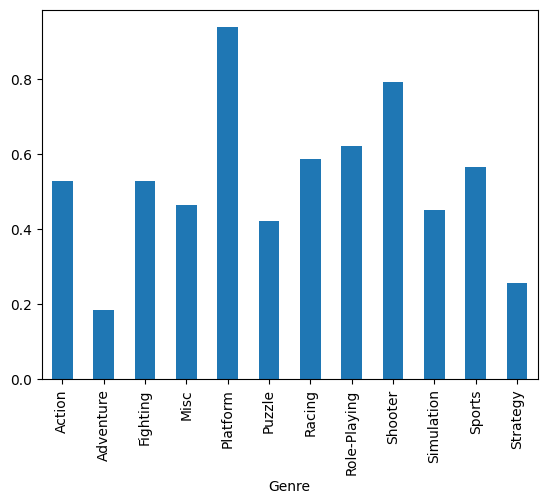

In [49]:
group["Global_Sales"].mean().plot(kind="bar")

<Axes: xlabel='Genre'>

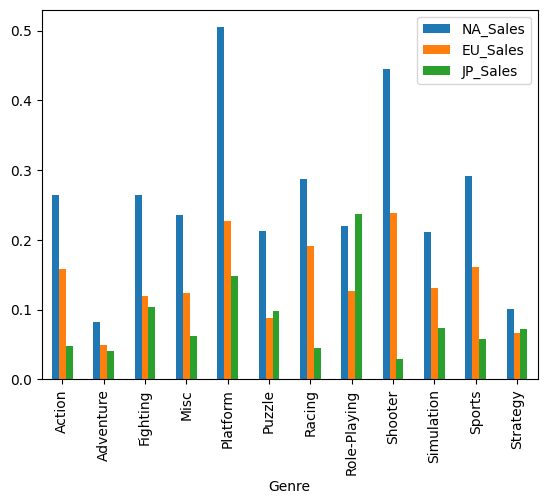

In [50]:
group[["NA_Sales","EU_Sales","JP_Sales"]].mean().plot(kind="bar")